In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

# Path to your zip file (replace with your file's path)
zip_file_path = '/content/drive/MyDrive/OSCD.zip'
dataset_folder = '/content/drive/MyDrive/OSCD/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Unzipped to: {dataset_folder}")

Unzipped to: /content/drive/MyDrive/OSCD/


In [21]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

train_folder = os.path.join(dataset_folder, 'coco_carton/oneclass_carton/images/train2017')
val_folder = os.path.join(dataset_folder, 'coco_carton/oneclass_carton/images/val2017')
train_annotation = os.path.join(dataset_folder, 'coco_carton/oneclass_carton/annotations/instances_train2017.json')
val_annotation = os.path.join(dataset_folder, 'coco_carton/oneclass_carton/annotations/instances_val2017.json')


transform = transforms.Compose([
    # transforms.Resize((512, 512)),
    transforms.ToTensor()
])

train_dataset = datasets.CocoDetection(root=train_folder, annFile=train_annotation, transform=transform)
val_dataset = datasets.CocoDetection(root=val_folder, annFile=val_annotation, transform=transform)

loading annotations into memory...
Done (t=2.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


In [22]:
def collate_fn(batch):
    images, targets = list(zip(*batch))
    return images, targets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

In [46]:
train_data = next(iter(train_loader))
val_data = next(iter(val_loader))

In [ ]:
!pip install pycocotools

In [34]:
from pycocotools import mask as maskUtils
import numpy as np
import matplotlib.pyplot as plt

def polygons_to_mask(segmentations, height, width):
    rles = maskUtils.frPyObjects(segmentations, height, width)
    rle = maskUtils.merge(rles)
    mask = maskUtils.decode(rle)
    return mask

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def show_image_with_masks(img, target):
    H, W = img.shape[:2]
    print(H, W)

    plt.figure(figsize=(12,12))
    plt.imshow(img)

    for obj in target:
        segmentation = obj['segmentation']
        mask = polygons_to_mask(segmentation, H, W)
        masked = np.ma.masked_where(mask == 0, mask)
        plt.imshow(masked, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.show()

torch.Size([3, 324, 500])
324 500


<Figure size 1200x1200 with 0 Axes>

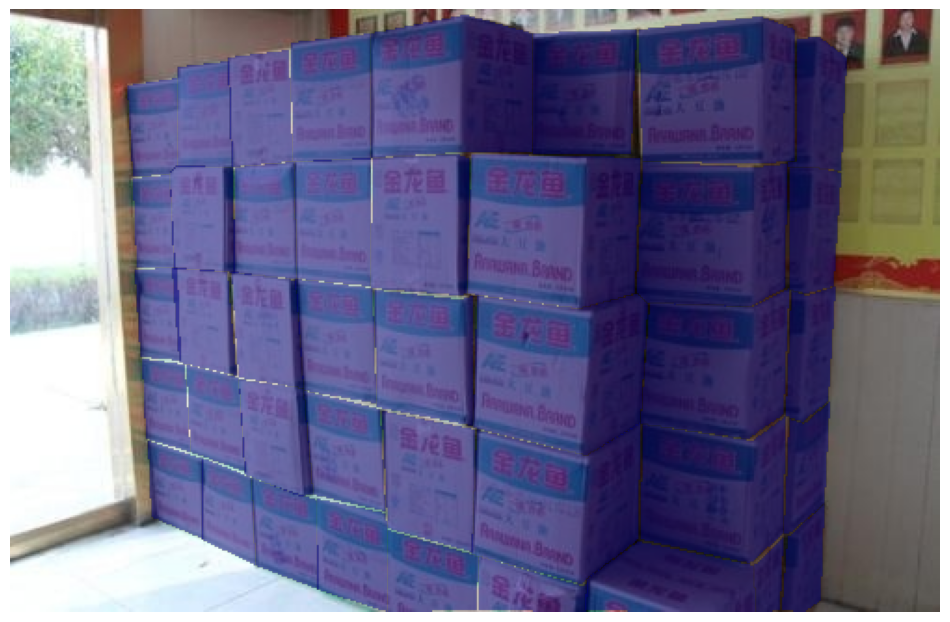

In [60]:
img = train_data[0][12]
target = train_data[1][12]
print(img.shape)
img_np = img.permute(1, 2, 0).cpu().numpy()
plt.figure(figsize=(12,12))
show_image_with_masks(img_np, target)
plt.show()